### Data Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
# Read in the combined csv

df_original = pd.read_csv('../data/combined.csv')

/Users/young_park/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (64,78,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# Set the df variable which only contains the columns I am interested in

df = df_original[['subreddit', 'selftext', 'title']]

In [7]:
df.head()

,subreddit,selftext,title
0,Target,NaN,"Please bullseye, have mercy"
1,Target,Hi everyone! My first orientation day is comin...,What to wear on first day?
2,Target,NaN,Anyone else’s “leaders” act more like managers?
3,Target,My gf recently was threatened with termination...,The customers word over yours
4,Target,Anyone else scroll to the bottom of the commen...,Downvote scroll


In [8]:
df.isnull().sum()

subreddit       0
selftext     4218
title           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  10000 non-null  object
 1   selftext   5782 non-null   object
 2   title      10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [10]:
# Selftext section is missing a lot of values. To account for this, I decided to replace nulls with text from the title section.

df['selftext'].fillna(df['title'], inplace=True)

/Users/young_park/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
df.head()

,subreddit,selftext,title
0,Target,"Please bullseye, have mercy","Please bullseye, have mercy"
1,Target,Hi everyone! My first orientation day is comin...,What to wear on first day?
2,Target,Anyone else’s “leaders” act more like managers?,Anyone else’s “leaders” act more like managers?
3,Target,My gf recently was threatened with termination...,The customers word over yours
4,Target,Anyone else scroll to the bottom of the commen...,Downvote scroll


In [12]:
# Assigning 1 if Target, 0 if Walmart

df['subreddit_indicator'] = df['subreddit'].apply(lambda x:1 if x=='Target' else 0)

<ipython-input-12-43994307cf7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subreddit_indicator'] = df['subreddit'].apply(lambda x:1 if x=='Target' else 0)


In [13]:
df.head()

,subreddit,selftext,title,subreddit_indicator
0,Target,"Please bullseye, have mercy","Please bullseye, have mercy",1
1,Target,Hi everyone! My first orientation day is comin...,What to wear on first day?,1
2,Target,Anyone else’s “leaders” act more like managers?,Anyone else’s “leaders” act more like managers?,1
3,Target,My gf recently was threatened with termination...,The customers word over yours,1
4,Target,Anyone else scroll to the bottom of the commen...,Downvote scroll,1


In [14]:
# Calculating title length

df['selftext_length'] = [len(x) for x in df['selftext']]

<ipython-input-14-62755f5d226c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selftext_length'] = [len(x) for x in df['selftext']]


In [15]:
df.head()

,subreddit,selftext,title,subreddit_indicator,selftext_length
0,Target,"Please bullseye, have mercy","Please bullseye, have mercy",1,27
1,Target,Hi everyone! My first orientation day is comin...,What to wear on first day?,1,241
2,Target,Anyone else’s “leaders” act more like managers?,Anyone else’s “leaders” act more like managers?,1,47
3,Target,My gf recently was threatened with termination...,The customers word over yours,1,506
4,Target,Anyone else scroll to the bottom of the commen...,Downvote scroll,1,141


In [16]:
# Calculating title word count

df['selftext_word_count'] = [len(x.split()) for x in df['selftext']]

<ipython-input-16-848e4225d986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selftext_word_count'] = [len(x.split()) for x in df['selftext']]


In [17]:
df.head()

,subreddit,selftext,title,subreddit_indicator,selftext_length,selftext_word_count
0,Target,"Please bullseye, have mercy","Please bullseye, have mercy",1,27,4
1,Target,Hi everyone! My first orientation day is comin...,What to wear on first day?,1,241,46
2,Target,Anyone else’s “leaders” act more like managers?,Anyone else’s “leaders” act more like managers?,1,47,7
3,Target,My gf recently was threatened with termination...,The customers word over yours,1,506,91
4,Target,Anyone else scroll to the bottom of the commen...,Downvote scroll,1,141,27


In [18]:
df.isnull().sum()

subreddit              0
selftext               0
title                  0
subreddit_indicator    0
selftext_length        0
selftext_word_count    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            10000 non-null  object
 1   selftext             10000 non-null  object
 2   title                10000 non-null  object
 3   subreddit_indicator  10000 non-null  int64 
 4   selftext_length      10000 non-null  int64 
 5   selftext_word_count  10000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


Data cleaning process was fairly straightforward in this case. The only treatment that required manual intervention was the selftext column as it contained a lot of nulls. For this exercise, I decided to replace null selftext with texts from the title column. I also created a subreddit_indicator column in which I assigned 1 for posts from the Target subreddit and 0 for posts from the Walmart subreddit.

## EDA

In [20]:
df.describe()

,subreddit_indicator,selftext_length,selftext_word_count
count,10000.000000,10000.000000,10000.000000
mean,0.500000,239.631900,45.886500
std,0.500025,407.221388,76.426108
min,0.000000,1.000000,1.000000
25%,0.000000,41.000000,7.000000
50%,0.500000,107.000000,20.000000
75%,1.000000,284.000000,55.000000
max,1.000000,13657.000000,2323.000000


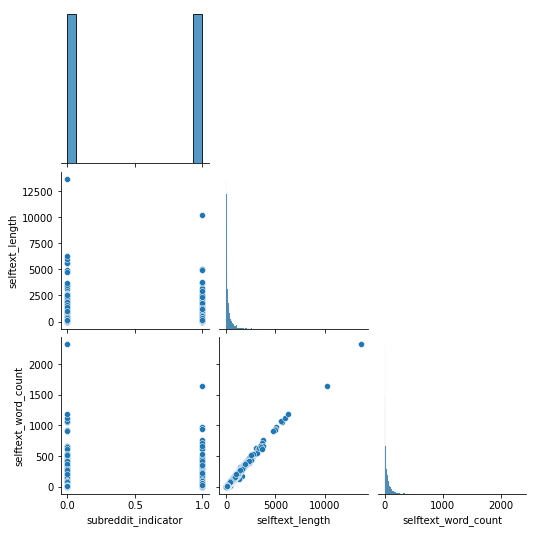

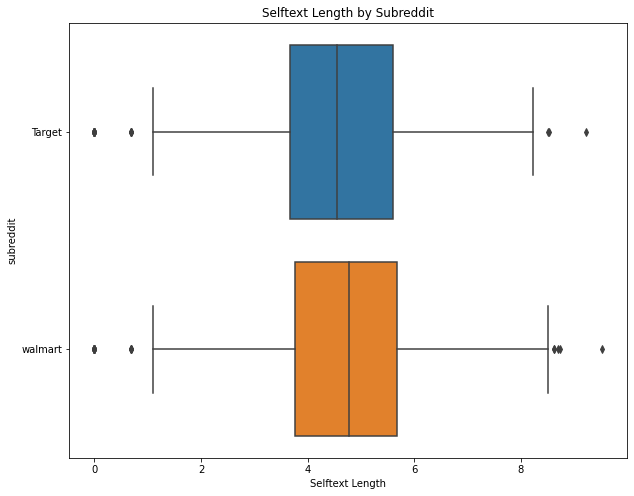

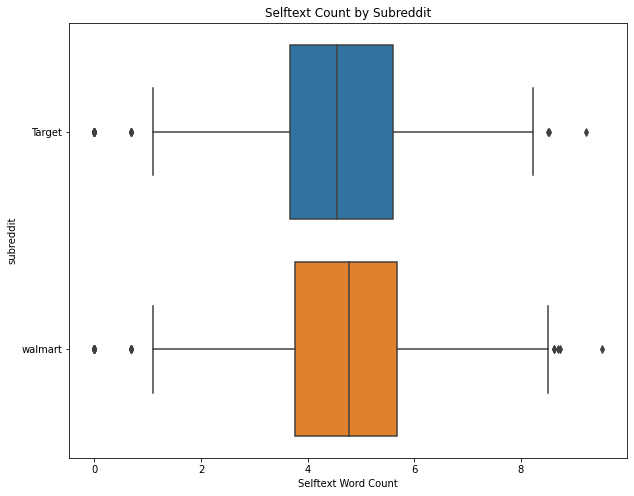

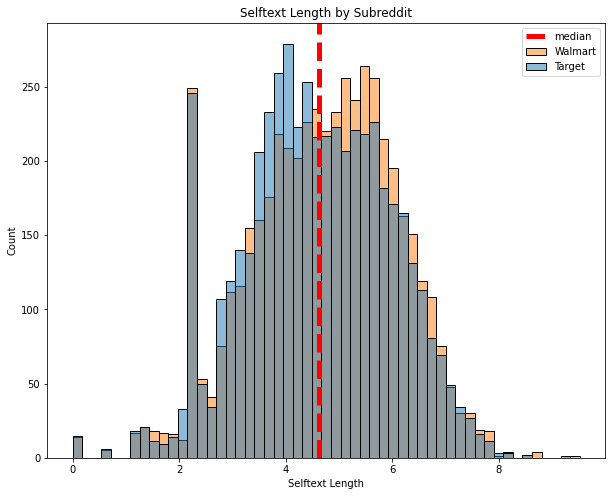

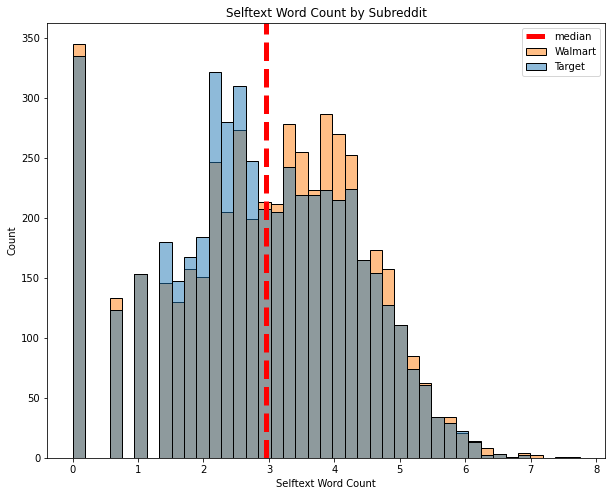

In [21]:
# Boxplot of selftext_length and selftext_word_count, both on log scale.
# Log transformed selftext_length and selftext_word_count because the distributions were heavily skewed to the right.

# Pairplot
sns.pairplot(df, corner=True);

# Boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x=np.log(df['selftext_length']), y='subreddit')
plt.title('Selftext Length by Subreddit')
plt.xlabel(xlabel='Selftext Length')

plt.figure(figsize=(10,8))
sns.boxplot(data=df, x=np.log(df['selftext_length']), y='subreddit')
plt.title('Selftext Count by Subreddit')
plt.xlabel(xlabel='Selftext Word Count');


# Histplot
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = np.log(df['selftext_length']), hue='subreddit')
plt.title('Selftext Length by Subreddit')
plt.xlabel(xlabel='Selftext Length')
plt.axvline(np.log(df['selftext_length']).mean(), linewidth=5, linestyle='--', color='red')
plt.legend(labels=['median', 'Walmart', 'Target'])

plt.figure(figsize=(10,8))
sns.histplot(data = df, x=np.log(df['selftext_word_count']), hue='subreddit')
plt.title('Selftext Word Count by Subreddit')
plt.xlabel(xlabel='Selftext Word Count')
plt.axvline(np.log(df['selftext_word_count']).mean(), linewidth=5, linestyle='--', color='red')
plt.legend(labels=['median', 'Walmart', 'Target']);

A couple of interesting observations:

- In the pairplot, I saw that selftext_length and selftext_word_count were heavily skewed to the right. To visually make this a bit more digestible, I log transformed the both features to make them look more "normal".

- In terms of distributions between the two features, posts from both Target and Walmart share very similar distributions around the mean.

In [22]:
# Setting up X and y

X = df['selftext']
y = df['subreddit_indicator']

In [23]:
# Using CountVectorizer to transform X

cvec = CountVectorizer()
Z = cvec.fit_transform(X)
Z_df = pd.DataFrame(Z.todense(), columns=cvec.get_feature_names())

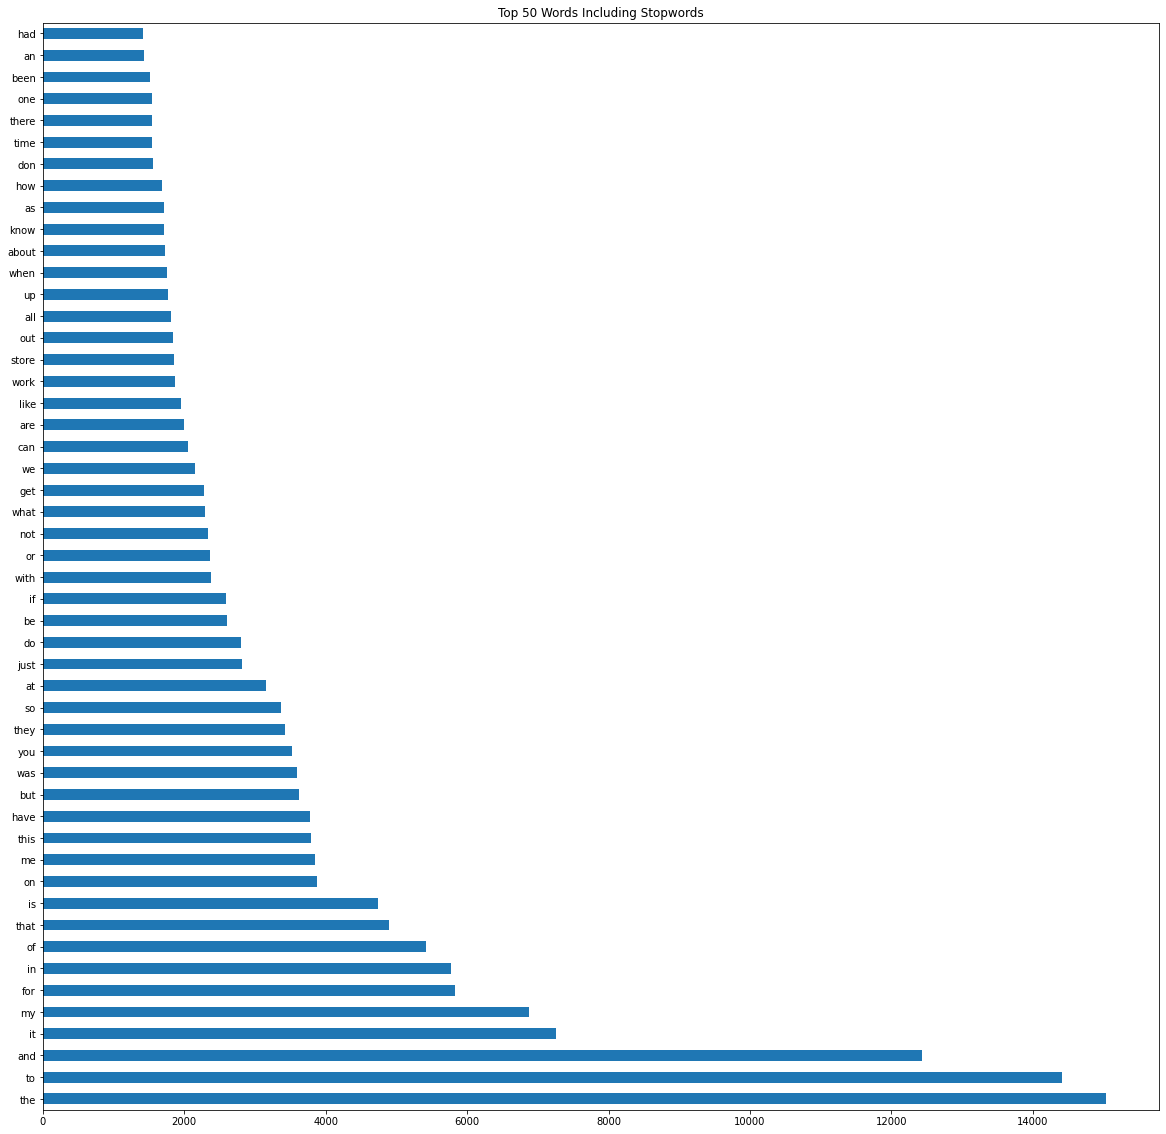

In [24]:
# Top 50 words including stopwords

plt.figure(figsize=(20,20))
Z_df.sum().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title('Top 50 Words Including Stopwords');

In [25]:
# Setting up second CountVectorizer, this time excluding stopwords

cvec_2 = CountVectorizer(stop_words='english')

In [26]:
Z_2 = cvec_2.fit_transform(X)

In [27]:
Z_2_df = pd.DataFrame(Z_2.todense(), columns=cvec_2.get_feature_names())

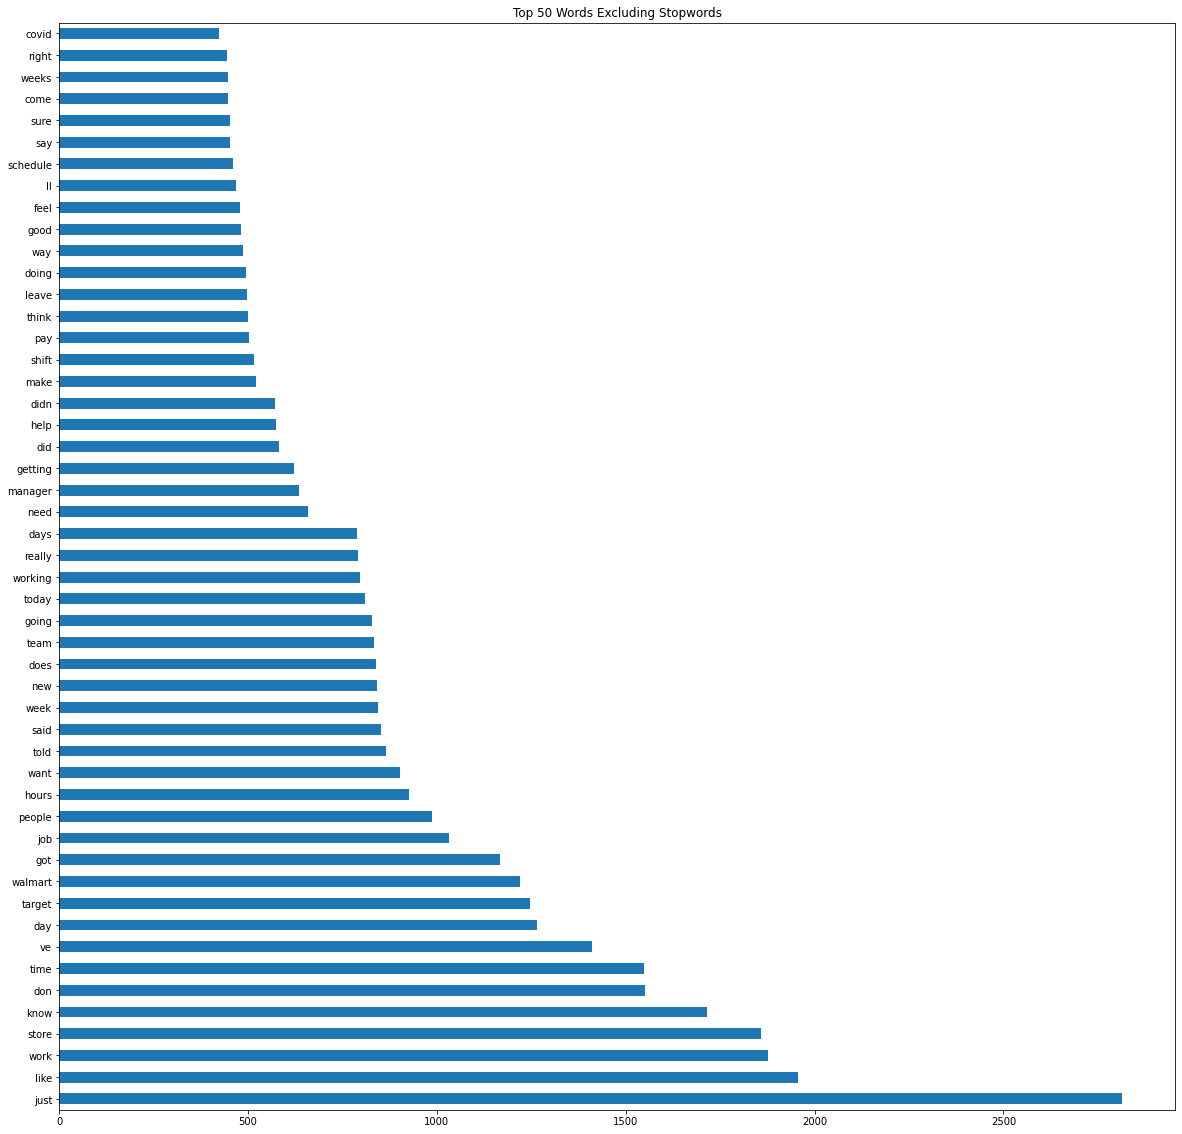

In [36]:
# Top 50 words excluding stopwords

plt.figure(figsize=(20,20))
Z_2_df.sum().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title('Top 50 Words Excluding Stopwords');

In [29]:
# Looking at top 50 words separately for Target and Walmart

df_target = df[df['subreddit'] == 'Target']
df_walmart = df[df['subreddit'] == 'walmart']

X_target = df_target['selftext']
X_walmart = df_walmart['selftext']

In [30]:
# Using CountVectorizer

cvec_target = CountVectorizer(stop_words='english')
Z_target = cvec_target.fit_transform(X_target)
Z_target_df = pd.DataFrame(Z_target.todense(), columns=cvec_target.get_feature_names())

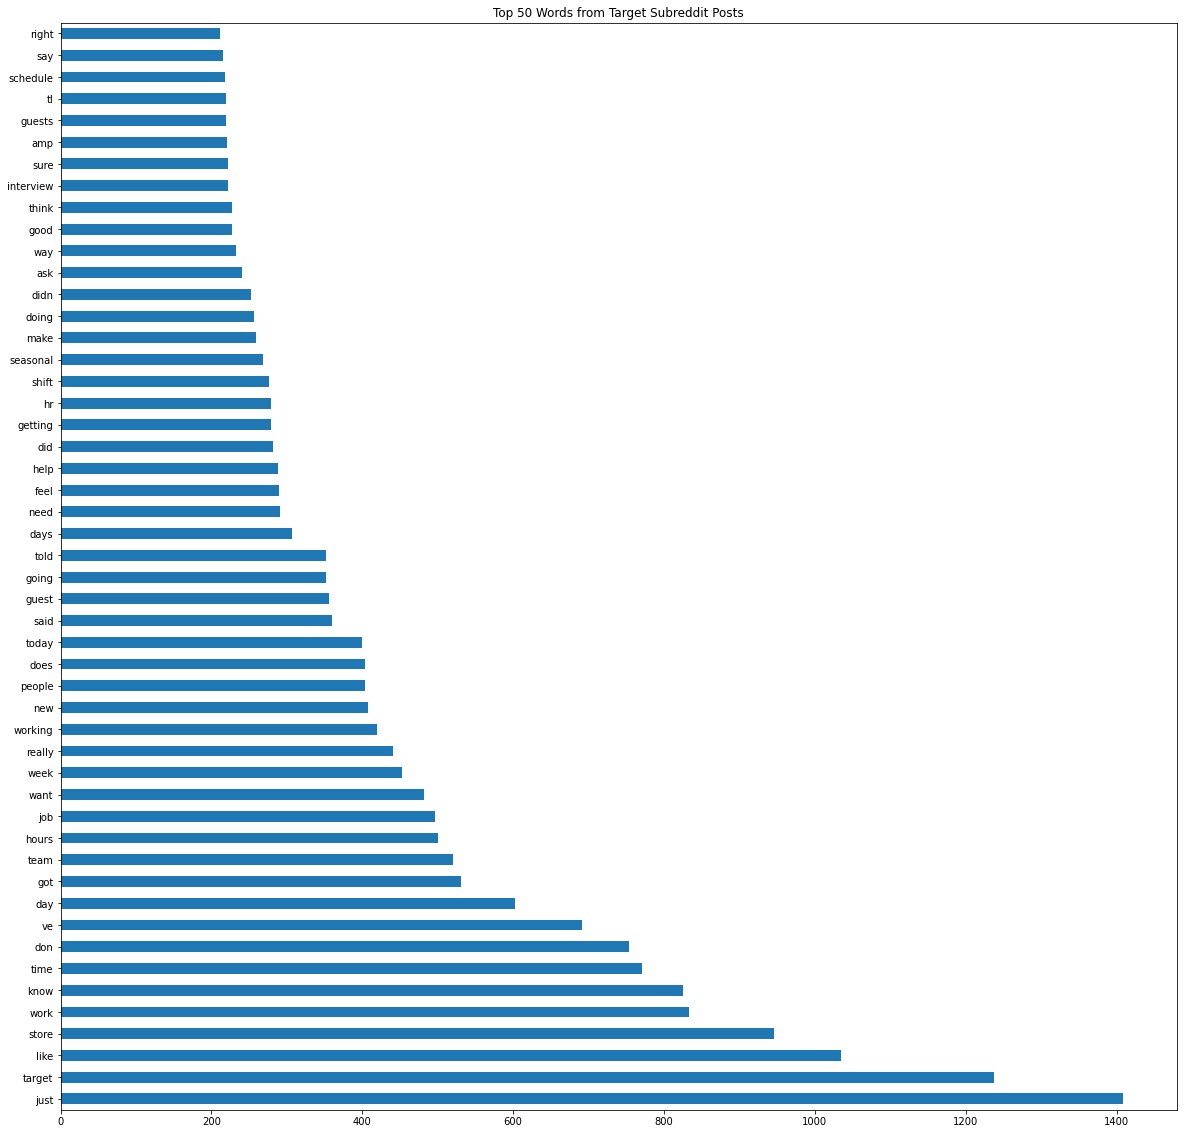

In [46]:
plt.figure(figsize=(20,20))
Z_target_df.sum().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title('Top 50 Words from Target Subreddit Posts');

In [32]:
cvec_walmart = CountVectorizer(stop_words='english')
Z_walmart = cvec_walmart.fit_transform(X_walmart)
Z_walmart_df = pd.DataFrame(Z_walmart.todense(), columns=cvec_walmart.get_feature_names())

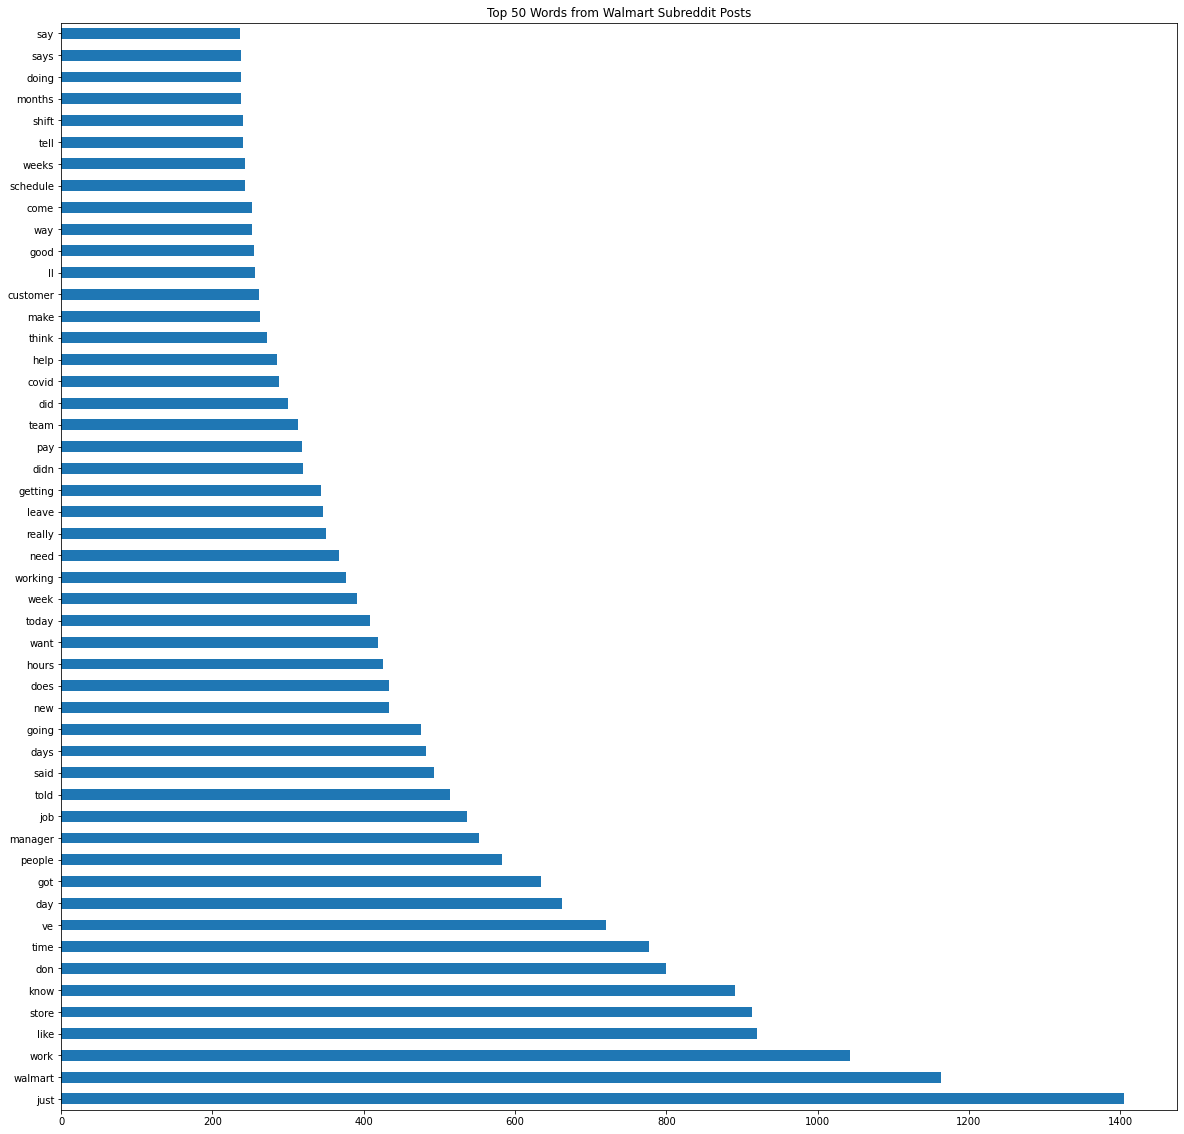

In [33]:
plt.figure(figsize=(20,20))
Z_walmart_df.sum().sort_values(ascending=False).head(50).plot(kind='barh')
plt.title('Top 50 Words from Walmart Subreddit Posts');

In [34]:
sentiment = SentimentIntensityAnalyzer()

neg = []
neu = []
pos = []
compound = []

for text in X:
    neg.append(sentiment.polarity_scores(text)['neg'])
    neu.append(sentiment.polarity_scores(text)['neu'])
    pos.append(sentiment.polarity_scores(text)['pos'])
    compound.append(sentiment.polarity_scores(text)['compound'])
    


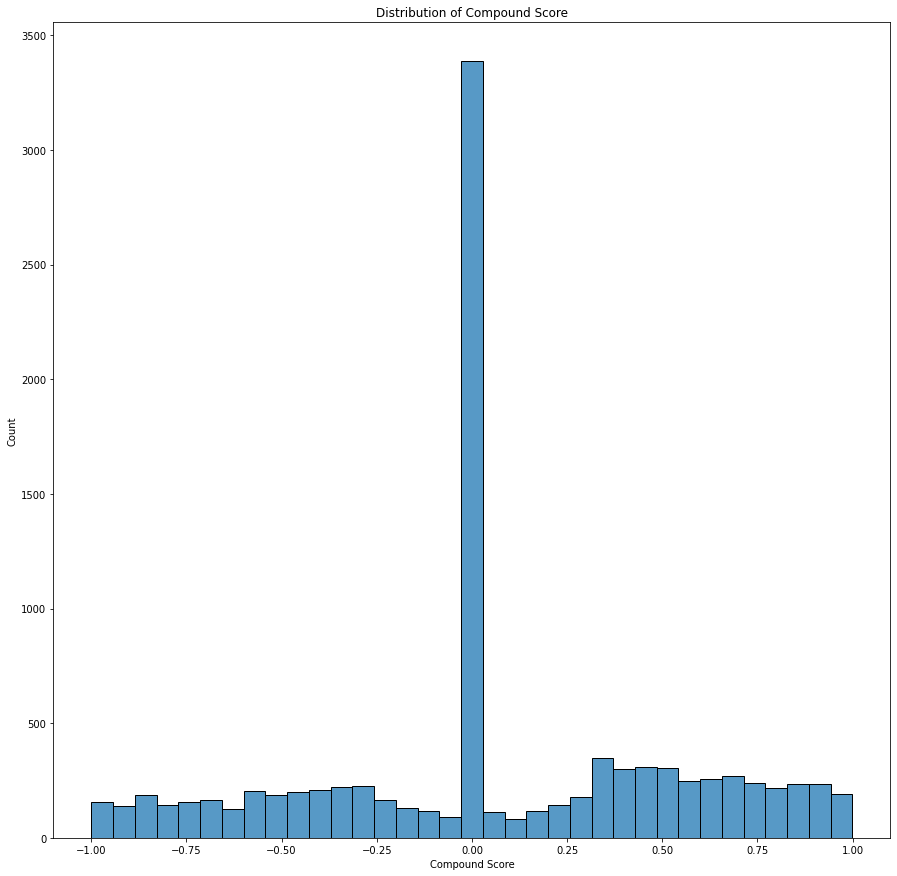

In [35]:
plt.figure(figsize=(15,15))
sns.histplot(compound);
plt.xlabel(xlabel='Compound Score')
plt.title('Distribution of Compound Score');

### EDA Summary


To get a better understanding of what words appear the most, I decided to use CountVectorizer to tokenize the selftext column and looked at top 50 words in the combined data set including stopwords and excluding stopwords, and as well as top 50 words for each subreddit posts excluding stopwords.

As anticipated, at a high level glance, I couldn't find significant difference in selection of words between posts from the two subreddits. I did notice that the words "target" and "walmart" appeared a lot which could definitely help the model make better prediction since I would consider them as "keywords". To make this exercise a bit more fun and challenging, I decided to experiment and see how much impact those "keywords" can play in model performance. Consquently, during the modeling process, I decided to measure the performance including and excluding stopwords & keywords.

Lastly, I decided to apply VADER trained SentimentIntensityAnalyzer to perform a sentiment analysis. Distribution of compound score showed that the top majority of posts were neutral in nature, with equal amount of both positive and negative sentiment posts but relatively small compared to neutral posts.